In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("final_merged.csv").dropna().to_numpy()
actiware_class_vector = dataset[:,2]
ENMO_vector = dataset[:,3]

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

assert len(actiware_class_vector) == len(ENMO_vector), "Input and output vectors must have the same length!"

X = ENMO_vector.reshape(-1,1)  
y = actiware_class_vector.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False) # avoid overfit

knn = KNeighborsClassifier(n_neighbors=2)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9336


In [5]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13010
           1       0.88      0.48      0.62      1663

    accuracy                           0.93     14673
   macro avg       0.91      0.74      0.79     14673
weighted avg       0.93      0.93      0.92     14673

[[12902   108]
 [  867   796]]


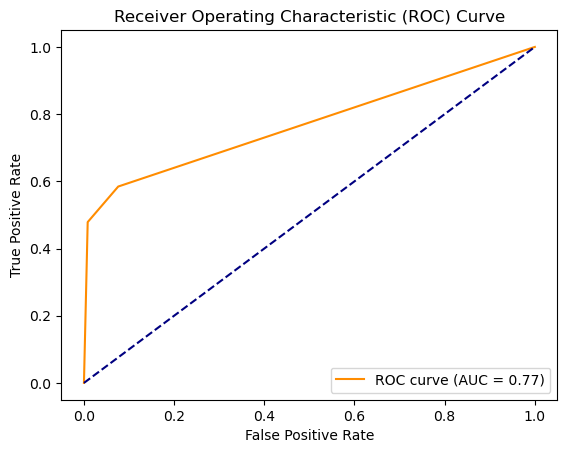

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

y_prob = knn.predict_proba(X_test)[:, 1]  # predicted probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


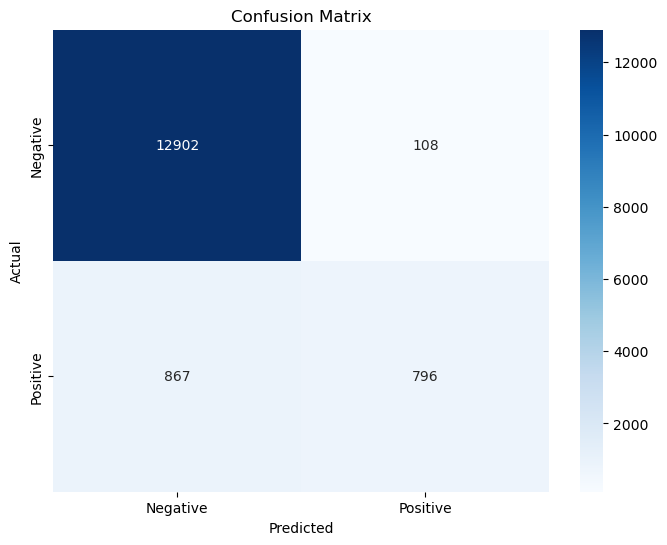

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = ENMO_vector.reshape(-1,1)  
y = actiware_class_vector.astype(int)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# 1. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Choosing the Right 'k' & 3. Weighted k-NN
params = {
    'n_neighbors': list(range(1, 31)), # Checking values of k from 1 to 30
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params, cv=5)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9635
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13505
           1       0.87      0.64      0.74      1168

    accuracy                           0.96     14673
   macro avg       0.92      0.81      0.86     14673
weighted avg       0.96      0.96      0.96     14673

[[13396   109]
 [  426   742]]


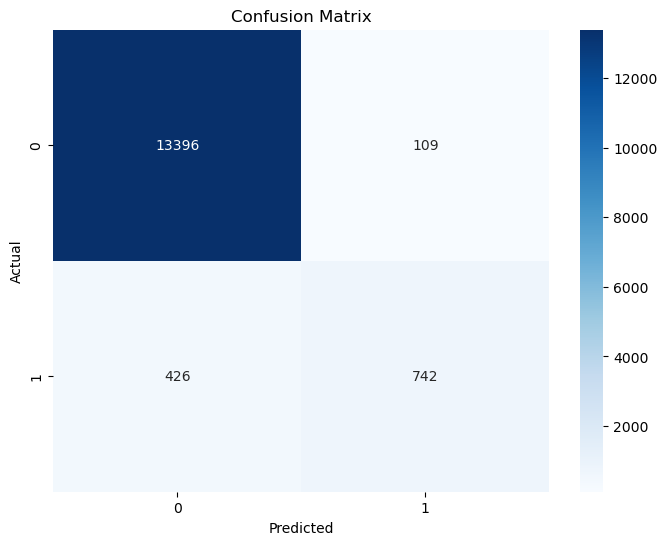

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'uniform'}


In [9]:
# Confusion Matrix Visualization
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Display best parameters
print(f"Best Parameters: {clf.best_params_}")

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns

assert len(actiware_class_vector) == len(ENMO_vector), "Input and output vectors must have the same length!"

X = ENMO_vector.reshape(-1, 1)
y = actiware_class_vector.astype(int)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
params = {
    'n_neighbors': list(range(1, 21)),  # Checking values of k from 1 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params, cv=50)
clf.fit(X_train_scaled, y_train)

# Predicting using the best model
y_pred = clf.predict(X_test_scaled)
y_score = clf.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9404
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     13010
           1       0.87      0.56      0.68      1663

    accuracy                           0.94     14673
   macro avg       0.91      0.77      0.82     14673
weighted avg       0.94      0.94      0.93     14673

[[12870   140]
 [  735   928]]


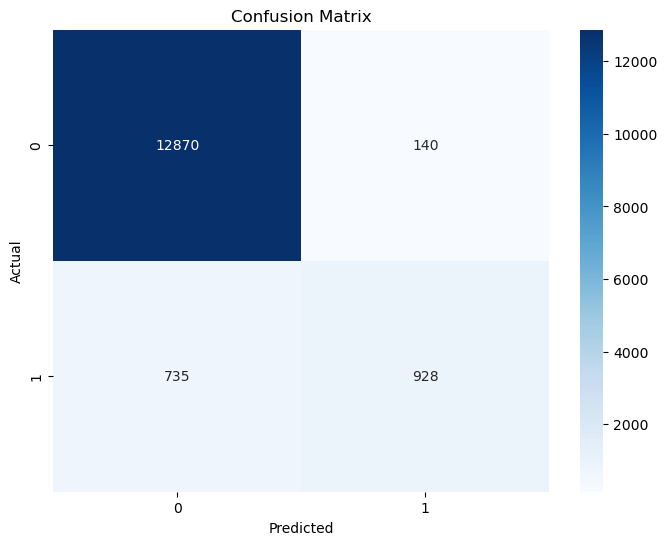

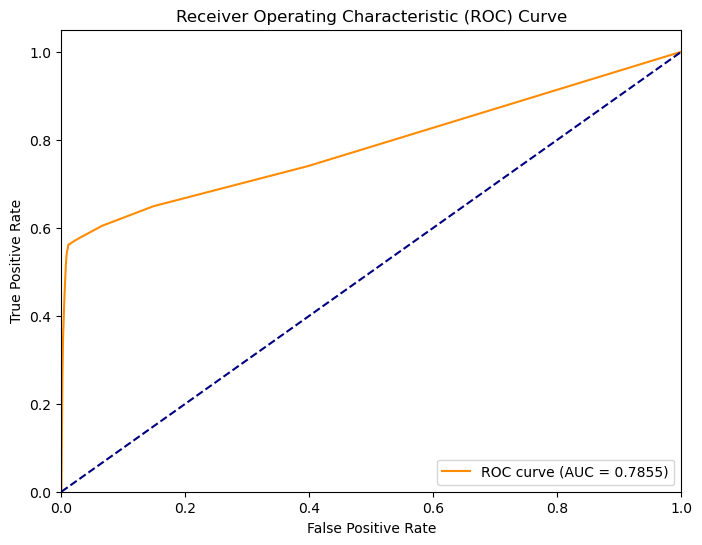

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}


In [11]:
# Plotting confusion matrix
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plotting ROC curve and computing AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Best Parameters: {clf.best_params_}")


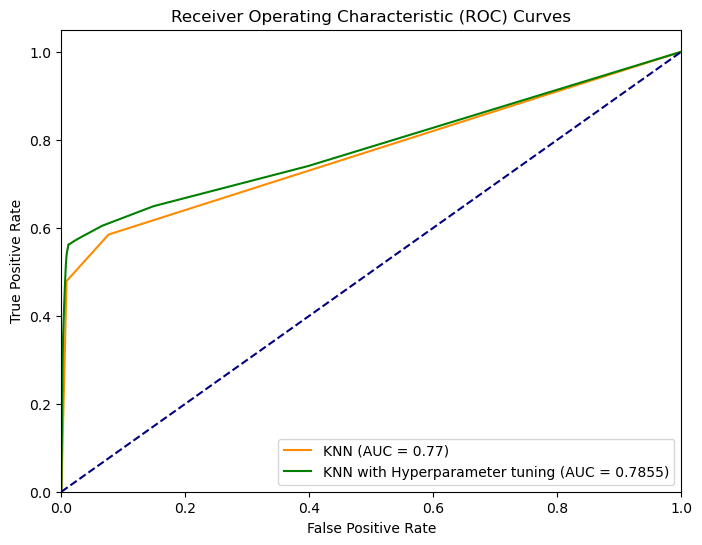

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}


In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)  # Fit the model to your training data

y_prob = knn.predict_proba(X_test)[:, 1]  # Now you can call predict_proba


# ROC curve for the first model (using knn.predict_proba)
y_prob = knn.predict_proba(X_test)[:, 1]  # predicted probabilities of positive class
fpr1, tpr1, _ = roc_curve(y_test, y_prob)
roc_auc1 = auc(fpr1, tpr1)

# Assuming y_score is already defined as predicted probabilities/scores of positive class from another model
fpr2, tpr2, _ = roc_curve(y_test, y_score)
roc_auc2 = auc(fpr2, tpr2)

# Plot both ROC curves on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', label=f'KNN (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', label=f'KNN with Hyperparameter tuning (AUC = {roc_auc2:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Print the best parameters (assuming clf is your GridSearchCV or RandomizedSearchCV object)
print(f"Best Parameters: {clf.best_params_}")
